
# Project: Investigate a Dataset - TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### **Dataset Description**
The TMDB 5000 Movie Dataset was collected from The Movie Database (TMDb) and contains detailed information on over 5,000 movies. This includes data on titles, cast, genres, revenue, budget, ratings, and popularity. The dataset is widely used to explore trends in movie production, analyze what factors contribute to a film’s financial success, and understand viewer preferences.


The dataset consists of **two main tables**:

---

####  **`tmdb_5000_movies.csv`**

Each row in this table represents one movie and includes the following columns:

| Column Name            | Description                                            |
| ---------------------- | ------------------------------------------------------ |
| `budget`               | Movie production budget (in US dollars)                |
| `genres`               | Genres associated with the movie (e.g., Action, Drama) |
| `homepage`             | Official movie website                                 |
| `id`                   | Unique movie identifier                                |
| `keywords`             | Keywords related to movie content                      |
| `original_language`    | Original language of the movie                         |
| `original_title`       | Original title of the movie                            |
| `overview`             | Summary or general description of the movie            |
| `popularity`           | Metric reflecting the movie's popularity on TMDb       |
| `production_companies` | Companies that produced the movie                      |
| `production_countries` | Countries where the movie was produced                 |
| `release_date`         | Release date of the movie                              |
| `revenue`              | Revenue earned by the movie                            |
| `runtime`              | Movie runtime in minutes                               |
| `spoken_languages`     | Languages spoken in the movie                          |
| `status`               | Movie status (e.g., Released, Post Production)         |
| `tagline`              | Movie tagline                                          |
| `title`                | Movie title                                            |
| `vote_average`         | Average rating received by the movie                   |
| `vote_count`           | Number of votes (ratings) the movie received           |

---

####  **`tmdb_5000_credits.csv`**

This table focuses on cast and crew information for each movie. Each row contains the cast and crew associated with a specific movie.

| Column Name | Description                                                  |
| ----------- | ------------------------------------------------------------ |
| `movie_id`  | Movie identifier (linked to the `id` column in movies table) |
| `title`     | Movie title                                                  |
| `cast`      | List of actors featured in the movie                         |
| `crew`      | List of crew members (e.g., director, producer, etc.)        |

---

#### 🔗 Relationship Between Tables:

The two tables have a **one-to-one relationship**, linked by the `id` column in the movies table (`tmdb_5000_movies.csv`) and the `movie_id` column in the credits table (`tmdb_5000_credits.csv`). This allows merging content-related movie information (like genre, revenue, ratings) with cast and crew details (such as director name or main actors).

---

### **Question for Analysis**

The goal of this project is to explore what factors are associated with a movie's financial success. To guide the investigation, I will focus on the following main question:

* **What factors are most associated with high movie revenue?**

To explore this question, I will analyze how revenue (the **dependent variable**) is related to the following **independent variables**:

1. **Budget** — Do higher-budget films tend to earn more revenue?
2. **Popularity** — Is there a strong correlation between a movie's popularity score and its revenue?
3. **Vote Average (Rating)** — Do higher-rated movies generate higher revenues?
4. **Genres** — Are certain genres more likely to produce higher-grossing films?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='darkgrid')


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load the datasets
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

# Display the first few rows of each dataframe
print("Movies Dataset:")
display(movies_df.head())

print("\nCredits Dataset:")
display(credits_df.head())

Movies Dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Credits Dataset:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# Check the size of each dataframe
print("Movies dataset shape:", movies_df.shape)
print("Credits dataset shape:", credits_df.shape)

Movies dataset shape: (4803, 20)
Credits dataset shape: (4803, 4)


The movies dataset has 4803 rows and 20 columns

The credits dataset has 4803 rows and 4 columns

In [5]:
# Inspect the data types and non-null counts
print("\nMovies info:")
movies_df.info()

print("\nCredits info:")
credits_df.info()


Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status 

In [6]:
# Check for missing values
print("\nMissing values in movies:")
print(movies_df.isnull().sum())

print("\nMissing values in credits:")
print(credits_df.isnull().sum())


Missing values in movies:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Missing values in credits:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


The movies dataset has missing values in hompage column , overview column , release_date column , runtime column , and tagline column

In [7]:
# a statistical summary of numeric columns
print("\nStatistical summary of movies dataset:")
print(movies_df.describe())


Statistical summary of movies dataset:
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%  


### Data Cleaning



In [8]:
# Merge movies and credits datasets on the common column 'id' and 'movie_id'
df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='left')

# Drop duplicate columns after merge (e.g., 'title_y' duplicate of 'title_x')
df.drop(columns=['title_y', 'movie_id'], inplace=True)

# Rename 'title_x' back to 'title' for clarity
df.rename(columns={'title_x': 'title'}, inplace=True)

# Check for duplicates in the combined dataframe
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [9]:
# Check for missing values again after merge
missing_values = df.isnull().sum()
print("Missing values per column after merge:")
print(missing_values[missing_values > 0])

Missing values per column after merge:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64


In [12]:
# Replace missing values in 'homepage' with a default text
df['homepage'].fillna('No homepage', inplace=True)

# Replace missing values in 'overview' with a default text
df['overview'].fillna('No overview available', inplace=True)

# Drop rows where 'release_date' or 'runtime' are missing, since these are important
df = df.dropna(subset=['release_date', 'runtime'])

# Replace missing values in 'tagline' with a default text
df['tagline'].fillna('No tagline', inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-12-856285507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['homepage'].fillna('No homepage', inplace=True)
/tmp/ipython-input-12-856285507.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [13]:
# Check for missing values again to make sure
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)



> After merging the movies and credits datasets, redundant columns were removed and the movie title column was renamed for clarity.
> We checked for duplicate rows and removed any duplicates to maintain data integrity.
> We inspected missing values: missing homepage URLs were replaced with a placeholder text, and rows missing critical data such as `release_date` and `runtime` were dropped.
> Missing values in less critical columns like `overview` and `tagline` were filled with default messages.
> These cleaning steps ensure the dataset is well-prepared for accurate and reliable analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research The Question (What factors are most associated with high movie revenue?)

**Correlation Matrix**

To quantitatively assess how movie **revenue** relates to other features, we computed the Pearson correlation coefficients between:

- **Revenue**
- **Popularity**
- **Vote Average (Rating)**

In [22]:
df[['revenue', 'popularity', 'vote_average']].corr()

,revenue,popularity,vote_average
revenue,1.000000,0.644654,0.197291
popularity,0.644654,1.000000,0.274212
vote_average,0.197291,0.274212,1.000000


> - **Revenue and Popularity** show a **moderately strong positive correlation** of **0.64**, indicating that more popular movies generally earn more revenue.
- **Revenue and Vote Average** have a **weak positive correlation** of **0.19**, suggesting that higher ratings are not strongly associated with higher earnings.
- **Popularity and Vote Average** are **weakly correlated** (**0.27**), meaning popular movies are not necessarily the highest-rated.

These findings support the idea that **popularity is more predictive of financial success than critical acclaim (vote average)**.

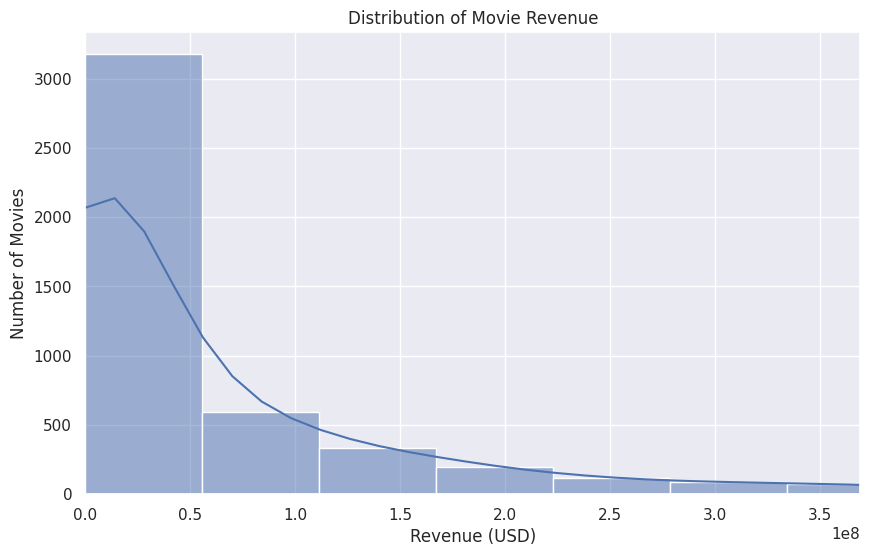

In [14]:
# Inspect the distribution of movie revenue
plt.figure(figsize=(10,6))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Number of Movies')
plt.xlim(0, df['revenue'].quantile(0.95))
plt.show()



> The distribution of movie revenues is heavily right-skewed, showing that most movies earn relatively low revenues while a few blockbuster films generate very high earnings.
> To better visualize the bulk of the data without distortion from extreme outliers, the x-axis is limited to approximately 375 million USD, which corresponds to the 95th percentile of the revenue distribution.




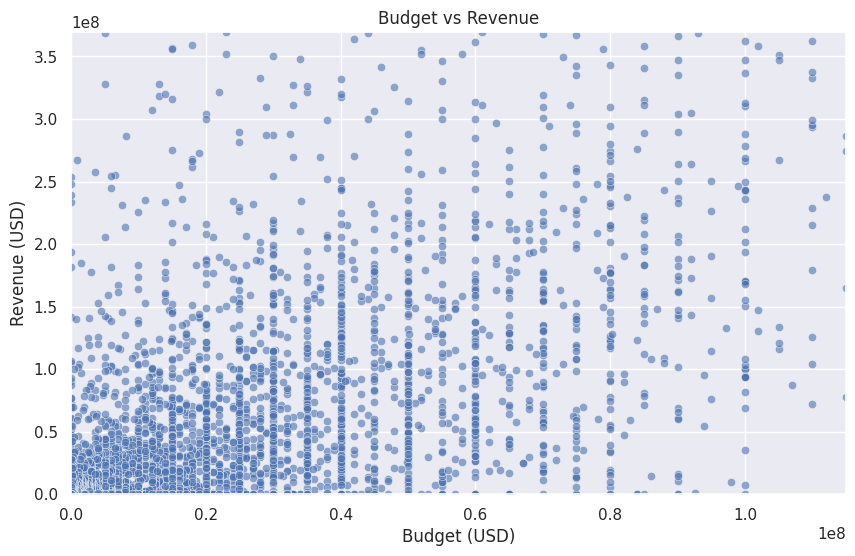

Correlation between budget and revenue: 0.73


In [15]:
# Examine relationship between budget and revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.xlim(0, df['budget'].quantile(0.95))
plt.ylim(0, df['revenue'].quantile(0.95))
plt.show()

# Calculate correlation between budget and revenue
budget_revenue_corr = df['budget'].corr(df['revenue'])
print(f"Correlation between budget and revenue: {budget_revenue_corr:.2f}")

> There is a positive correlation between budget and revenue (correlation coefficient ≈ 0.73), indicating that movies with higher budgets tend to generate higher revenues.
> However, the scatterplot shows substantial variability, suggesting that other factors also play important roles.

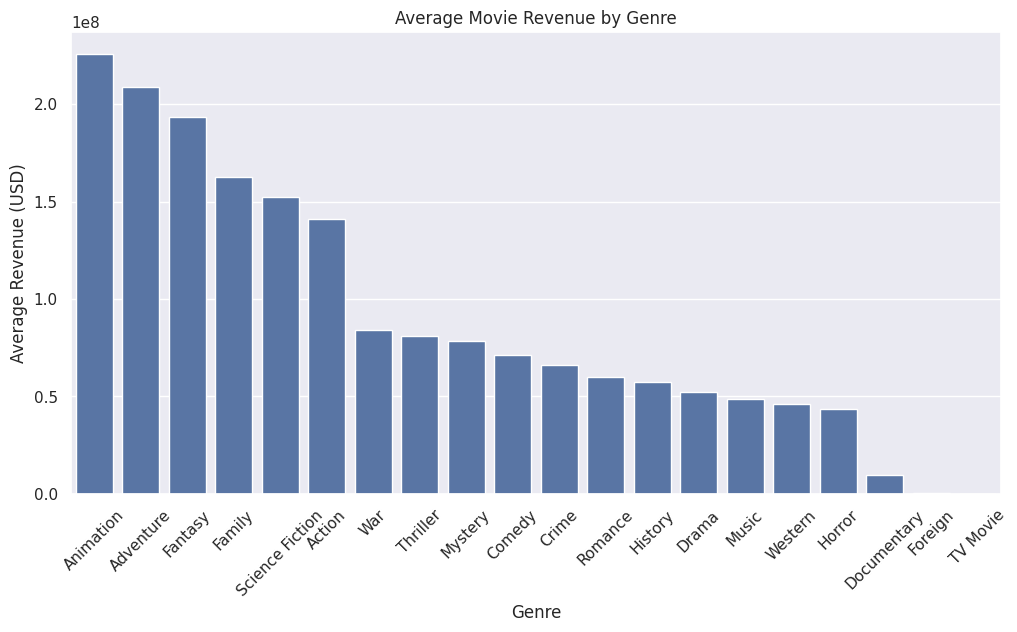

In [16]:
import ast

# Convert the genres column from stringified list of dicts to list of genre names
def extract_genres(genre_str):
    genres = ast.literal_eval(genre_str)
    return [g['name'] for g in genres]

df['genre_list'] = df['genres'].apply(extract_genres)

# Explode genres into separate rows for aggregation
df_genres = df.explode('genre_list')

# Calculate average revenue per genre
avg_revenue_by_genre = df_genres.groupby('genre_list')['revenue'].mean().sort_values(ascending=False)

# Plot average revenue by genre
plt.figure(figsize=(12,6))
sns.barplot(x=avg_revenue_by_genre.index, y=avg_revenue_by_genre.values)
plt.title('Average Movie Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

> By analyzing the average revenue per genre, we observe that some genres tend to generate higher average revenues than others , ex:Animation.

> This insight may help understand which types of movies are more financially successful on average.

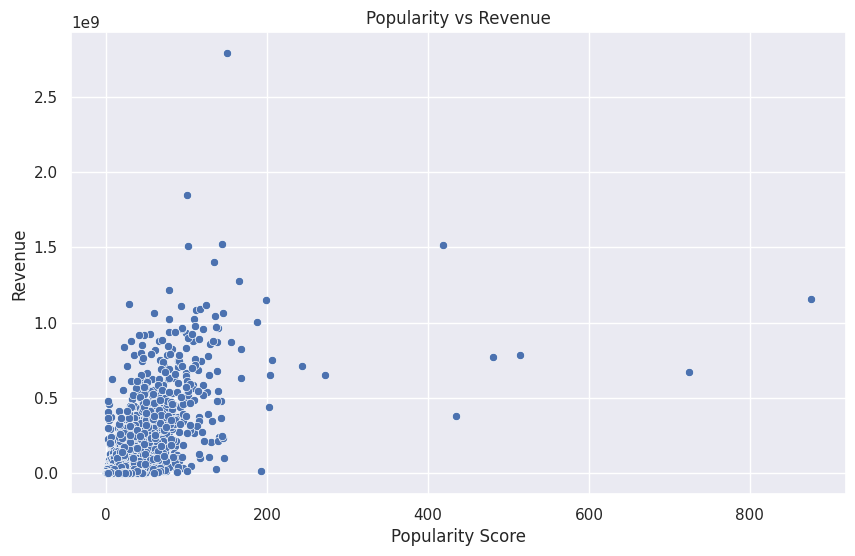

In [18]:
# Popularity vs Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity Score')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

> - There is a clear upward pattern , it indicates a **positive correlation** — i.e., popular movies are more likely to succeed financially.
- Outliers (e.g., extremely high-revenue movies with low popularity) may represent older blockbusters or films with delayed popularity.

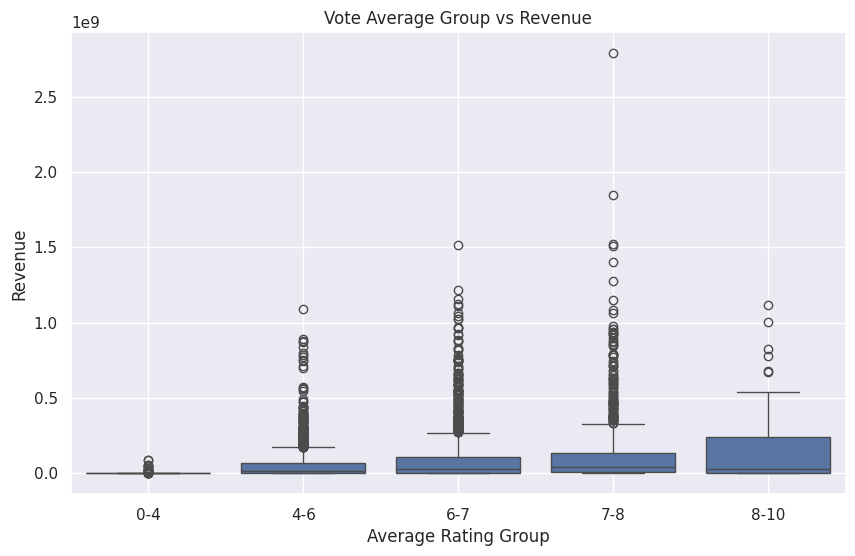

In [24]:
# Vote Average vs Revenue
bins = [0, 4, 6, 7, 8, 10]
labels = ['0-4', '4-6', '6-7', '7-8', '8-10']
df['vote_group'] = pd.cut(df['vote_average'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='vote_group', y='revenue')
plt.title('Vote Average Group vs Revenue')
plt.xlabel('Average Rating Group')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


>

- **Most revenue distributions are heavily skewed**, with many outliers — a small number of movies generate extremely high revenue.
- Movies rated between **7–8 and 8–10** tend to have **slightly higher median revenues** compared to lower rating groups.
- However, the **overall variation within each group is large**, and the interquartile ranges (IQRs) for all groups are relatively similar.
- There are **high-revenue outliers** in nearly every rating group, including the 4–6 and 6–7 groups — indicating that some lower-rated movies still perform very well at the box office.
- The **0–4 group** has the lowest revenue overall, with no notable outliers — suggesting that very low-rated movies rarely succeed financially.

In summary,
While there is a slight trend suggesting that **higher-rated movies (especially 7–10)** might earn more on average, the relationship between **ratings and revenue is weak**. Many lower-rated films also generate substantial revenue, indicating that **ratings alone are not a strong predictor of financial success**.


<a id='conclusions'></a>
## Conclusions


The analysis aimed to address the question: **What factors are most associated with high movie revenue?**

Based on the exploratory data analysis, the following conclusions were drawn:

- **Popularity** shows a **moderately strong positive correlation** with revenue (**r = 0.64**), indicating that more popular movies are generally more financially successful. The scatterplot confirms this trend, showing a clear upward pattern despite the presence of some outliers.

- **Vote Average (rating)** has only a **weak correlation** with revenue (**r = 0.19**). While movies rated between 7–10 tend to have slightly higher median revenues, the large variation and presence of high-revenue outliers in all rating groups suggest that **critical acclaim is not a strong predictor of revenue**.

- **Budget** demonstrates the **strongest correlation** with revenue among all factors analyzed (**r ≈ 0.73**), suggesting that **higher-budget films tend to earn more**. However, the scatterplot shows notable variability, meaning that budget alone does not guarantee high revenue.

- The **distribution of movie revenues is heavily right-skewed**, where most movies earn relatively modest amounts, and only a few generate extremely high revenue. To better interpret the visualizations, the revenue axis was capped at the 95th percentile (~$375 million).

- **Genre analysis** reveals that some genres, such as **Animation**, tend to have higher average revenues compared to others. This insight may help identify which types of movies are more likely to succeed financially.

#### Limitations:
- This analysis is **correlational**, and **no causal relationships** can be concluded. For example, while high budgets are associated with high revenue, this does not imply that increasing a movie's budget will directly cause increased earnings.
- Some variables (e.g., marketing spend, release timing, global distribution) that likely influence revenue were not included in the dataset and may affect the results.
- Outliers, especially in revenue and budget, may skew results despite efforts to adjust visualizations.

#### Final Note:
While multiple factors appear to be associated with movie revenue, **popularity and budget** stand out as the most influential. **Vote average** and **genre** offer some insights but are less predictive on their own. Further research incorporating additional variables and statistical modeling could provide deeper understanding of what drives box office success.


